<a href="https://colab.research.google.com/github/Faliirham/PCVK25_3F_11/blob/main/Week6_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***D. PRAKTIKUM PERTEMUAN 7***

**Fali Irham Maulana / 2341720121**

**TI 3F**

---

# **D. PRAKTIKUM FILTER**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load Library

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [ ]:
# c. Buatlah fungsi konvolusi.

def convolution(image, kernel, padding=0, strides=1):
    kernel = np.flipud(np.fliplr(kernel))  # flip kernel
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    xOutput = int(((xImgShape - xKernShape + 2*padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2*padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))
    imagePadded = np.zeros((xImgShape + padding*2, yImgShape + padding*2))
    imagePadded[padding:imagePadded.shape[0]-padding, padding:imagePadded.shape[1]-padding] = image

    for y in range(0, yImgShape, strides):
        if y > yImgShape - yKernShape:
            break
        for x in range(0, xImgShape, strides):
            if x > xImgShape - xKernShape:
                break
            output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
    return output

In [ ]:
#Load Citra Mernjadi Keabuan
img = cv.imread('//content/drive/MyDrive/PCVK25_3F_11/Gambar/mandrill.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [ ]:
# Kernel Filter
# a. Sharpening
sharpen_kernel = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

# b. Emboss
emboss_kernel = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])

# c. Sobel (Edge Detection - arah horizontal/vertical)
sobel_kernel = np.array([[1,0,-1],
                         [2,0,-2],
                         [1,0,-1]])

# d. Canny
canny_kernel = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])

# e. Gaussian Blur (21x21)
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.T

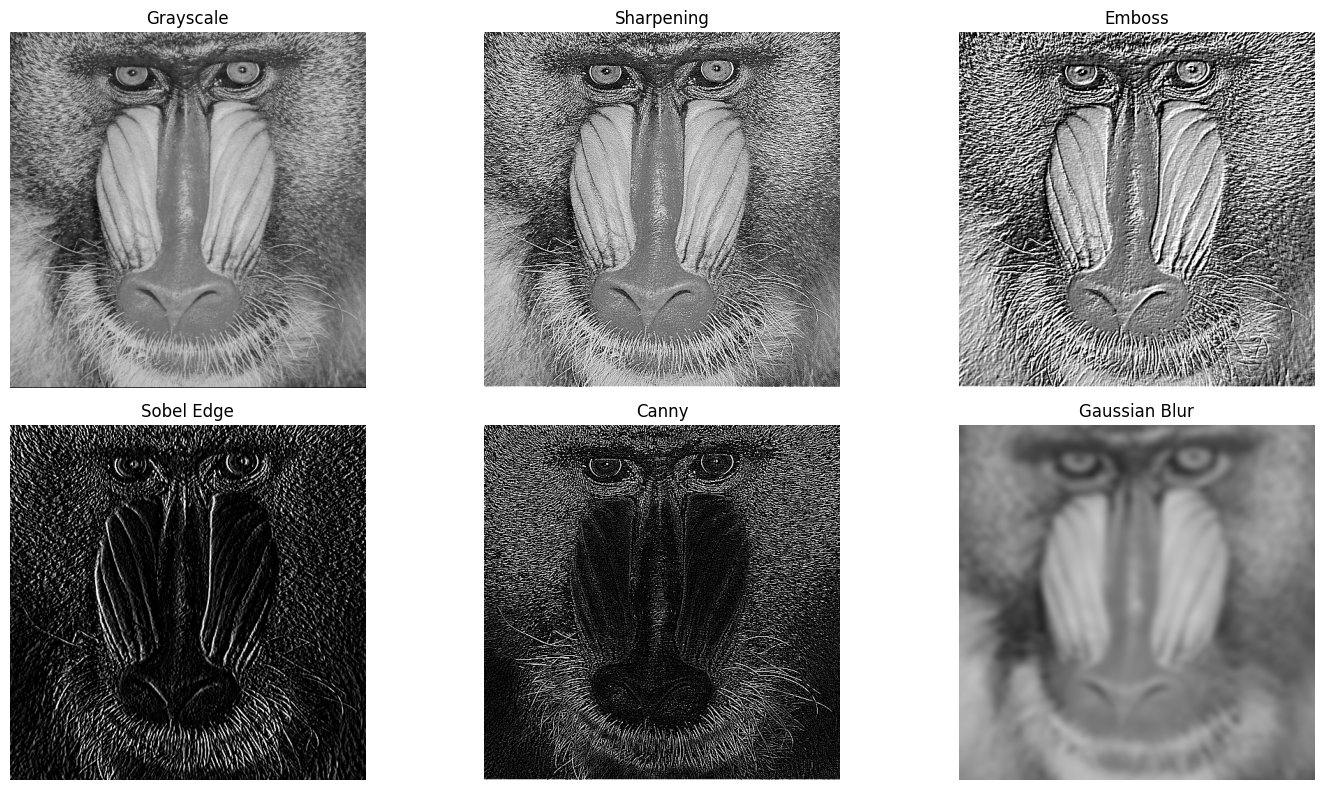

In [ ]:

# pemanggilan fungsi
sharpened = convolution(img_gray, sharpen_kernel)
embossed  = convolution(img_gray, emboss_kernel)
edges     = convolution(img_gray, sobel_kernel)
canny     = convolution(img_gray, canny_kernel)
gaussian_blur = convolution(img_gray, gauss_kernel)

titles = ['Grayscale', 'Sharpening', 'Emboss', 'Sobel Edge', 'Canny', 'Gaussian Blur']
images = [img_gray, sharpened, embossed, edges, canny, gaussian_blur]

plt.figure(figsize=(15, 8))

for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    # tampilkan dengan skala asli (0–255) biar sama seperti cv.imshow
    plt.imshow(images[i], cmap='gray', vmin=0, vmax=255)
    plt.title(titles[i], fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()


# ***E. FILTER LIBRARY DAN FILTER MODERN***

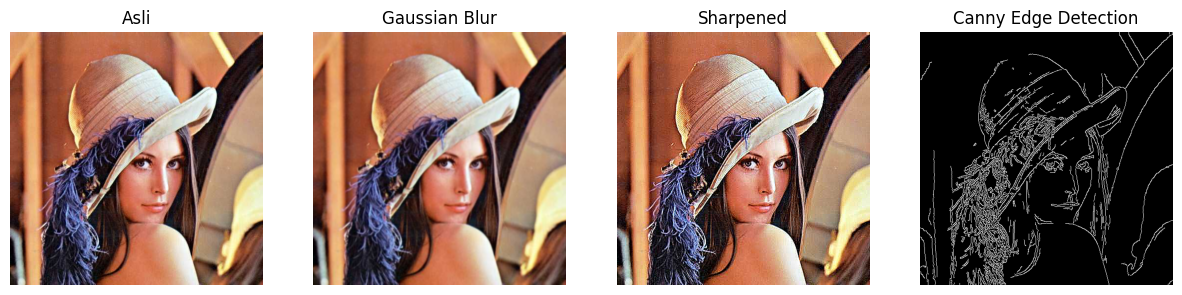

In [ ]:
# Percobaan 1
def show_side_by_side(images, titles, figsize=(15,5)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        if len(img.shape) == 2:  # grayscale
            plt.subplot(1, len(images), i+1)
            plt.imshow(img, cmap="gray")
        else:  # color
            plt.subplot(1, len(images), i+1)
            plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")
    plt.show()

img = cv.imread("/content/drive/MyDrive/PCVK25_3F_11/Gambar/lena.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

blur = cv.GaussianBlur(img, (7,7), 1)
edges = cv.Canny(cv.cvtColor(img, cv.COLOR_BGR2GRAY), 100, 200)
sharpen_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sharpened = cv.filter2D(img, -1, sharpen_kernel)

show_side_by_side(
    [img, blur, sharpened, edges],
    ["Asli", "Gaussian Blur", "Sharpened", "Canny Edge Detection"]
)

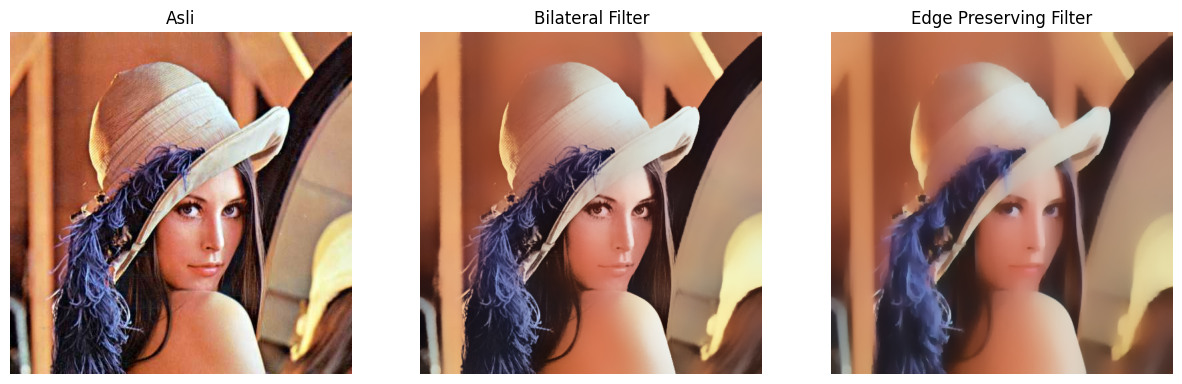

In [ ]:
# Percobaan 2
bilateral = cv.bilateralFilter(img, 50, 100, 100)

# Edge Preserving Filter (alternatif Guided Filter)
edge_preserve = cv.edgePreservingFilter(img, flags=1, sigma_s=100, sigma_r=0.9)

show_side_by_side([img, bilateral, edge_preserve],
                  ["Asli", "Bilateral Filter", "Edge Preserving Filter"])

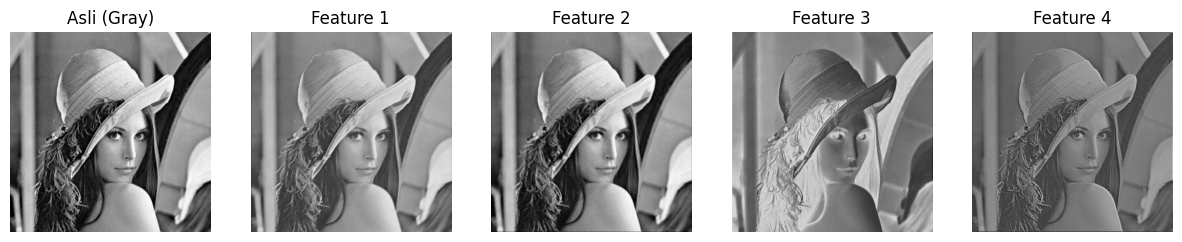

In [ ]:
# Percobaan 3

import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        return self.conv1(x)

model = SimpleCNN()

img = cv.imread("/content/drive/MyDrive/PCVK25_3F_11/Gambar/lena.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Ubah gambar ke tensor
img_tensor = torch.tensor(img_gray, dtype=torch.float32).unsqueeze(0).unsqueeze(0) / 255.0

# Hasil CNN
with torch.no_grad():
    features = model(img_tensor)

# Visualisasi feature maps
feature_maps = [features[0,i].numpy() for i in range(features.shape[1])]
show_side_by_side([img_gray] + feature_maps,
                  ["Asli (Gray)"] + [f"Feature {i+1}" for i in range(len(feature_maps))])

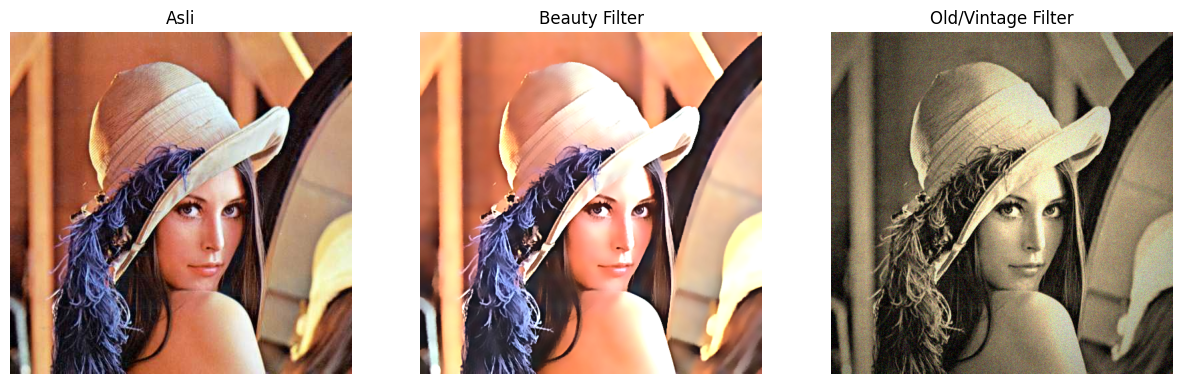

In [ ]:
# Percobaan 4

# Beauty Filter
# Step 1: Smoothing kulit dengan bilateral filter
smooth = cv.bilateralFilter(img, d=15, sigmaColor=75, sigmaSpace=75)

# Step 2: Unsharp masking (pertajam mata/bibir)
gaussian = cv.GaussianBlur(smooth, (0,0), 3)
sharpened = cv.addWeighted(smooth, 1.5, gaussian, -0.5, 0)

# Step 3: Brightness & contrast
alpha = 1.2   # contrast
beta = 15     # brightness
beauty = cv.convertScaleAbs(sharpened, alpha=alpha, beta=beta)

# Old/Vintage Filter

# Step 1: Sepia tone
sepia_kernel = np.array([[0.272, 0.534, 0.131],
                         [0.349, 0.686, 0.168],
                         [0.393, 0.769, 0.189]])
sepia = cv.transform(img, sepia_kernel)
sepia = np.clip(sepia, 0, 255).astype(np.uint8)

# Step 2: Vignette
rows, cols = img.shape[:2]
kernel_x = cv.getGaussianKernel(cols, cols*0.6)
kernel_y = cv.getGaussianKernel(rows, rows*0.6)
kernel = kernel_y * kernel_x.T
mask = kernel / kernel.max()
vignette = np.copy(sepia)
for i in range(3):
    vignette[:,:,i] = vignette[:,:,i] * mask

# Step 3: Noise/Grain
noise = np.random.normal(0, 15, vignette.shape).astype(np.int16)
old_img = np.clip(vignette.astype(np.int16) + noise, 0, 255).astype(np.uint8)

show_side_by_side(
    [img, beauty, old_img],
    ["Asli", "Beauty Filter", "Old/Vintage Filter"])

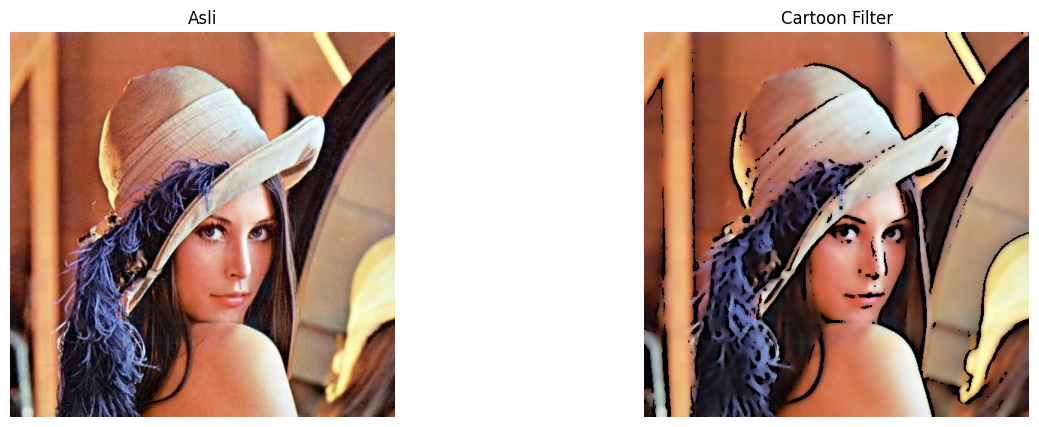

In [ ]:
# Percobaan 5

#Step 1: Edge detection
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_blur = cv.medianBlur(gray, 7)
edges = cv.adaptiveThreshold(gray_blur, 255,
                             cv.ADAPTIVE_THRESH_MEAN_C,
                             cv.THRESH_BINARY, 9, 9)

# Step 2: Bilateral filter untuk smoothing warna
color = cv.bilateralFilter(img, d=9, sigmaColor=200, sigmaSpace=200)

# Step 3: Gabungkan (cartoonize)
cartoon = cv.bitwise_and(color, color, mask=edges)

# Tampilkan
show_side_by_side([img, cartoon], ["Asli", "Cartoon Filter"])

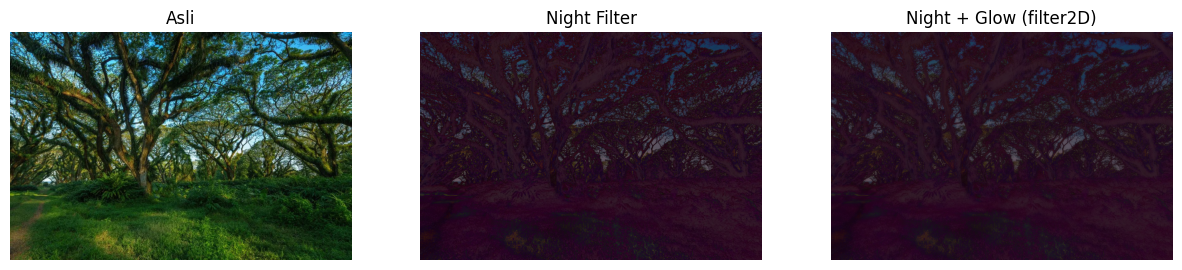

In [36]:
# Percobaan 6:
# Night Filter
img = cv.imread("/content/drive/MyDrive/PCVK25_3F_11/Gambar/djawatan.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Step 1: Gelapkan (contrast turun, brightness negatif)
night = cv.convertScaleAbs(img, alpha=0.6, beta=-40)

# Step 2: Tambah bias biru
blue_tint = np.full_like(night, (50, 0, 100))   # BGR
night = cv.addWeighted(night, 0.8, blue_tint, 0.2, 0)

# Step 3: Efek Glow di area terang dengan filter2D (blur kernel)
kernel = np.ones((15,15), np.float32) / 225
glow = cv.filter2D(night, -1, kernel)

# Kombinasikan asli + glow
night_glow = cv.addWeighted(night, 0.7, glow, 0.3, 0)

show_side_by_side([img, night, night_glow],
                  ["Asli", "Night Filter", "Night + Glow (filter2D)"])

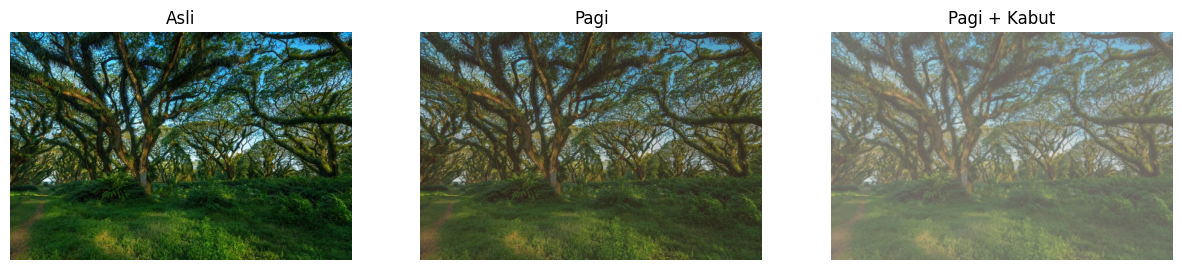

In [37]:
# Percobaan 7

alpha = 0.9   # contrast
beta = 20     # brightness
soft = cv.convertScaleAbs(img, alpha=alpha, beta=beta)

# Tambahkan warm tone (kemerahan / oranye)
warm_tint = np.full_like(soft, (40, 70, 120))   # BGR
pagi = cv.addWeighted(soft, 0.8, warm_tint, 0.2, 0)

# Tambahkan haze (kabut tipis) dengan filter2D
# Kernel blur Gaussian-Like untuk menciptakan efek kabut
kernel = cv.getGaussianKernel(3, 3)
kernel = kernel @ kernel.T   # jadikan 2D kernel
kabut = cv.filter2D(pagi, -1, kernel)

# tambah layer putih untuk kabut lebih nyata
white_layer = np.full_like(pagi, 255)
kabut = cv.addWeighted(kabut, 0.7, white_layer, 0.3, 0)

show_side_by_side([img, pagi, kabut],
                  ["Asli", "Pagi", "Pagi + Kabut"])
